## INDICE

* Planteamiento del problema y recopilación de datos
* Exploracion y limpieza de datos
* Analisis de variables univariante
* Analisis de variables multivariante
* Ingeniería de caracteristicas
* Selección de caracteristicas

## Paso 1. Planteamiento del problema y recopilación de datos
- El DataSet fue recolectado por una empresa en Nueva York y esta relacionado a la información del alquiler de viviendas a través de la aplicación Airbnb durante el año 2019. La data contiene la frecuencia de alquiler que tuvo una propiedad especifica en el lapso de tiempo donde fue racabada la informacion. Un anfitrion (host) especifico puede tener mas de una propiedad (listing) publicada en la pagina web de Airbnb.  
- El objetivo principal de este analisis estara enfocado en establecer que variables predictoras actuan sobre el **precio por dia** de los alquileres en Nueva York, para dejar planteadas las pautas a seguir para entrenar un modelo futuro de machine learnig. 


In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
from fitter import Fitter, get_common_distributions
from scipy.stats import lognorm

In [2]:
data_ab=pd.read_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/machine-learning-python-template/data/raw/AB_NYC_2019.csv')

In [3]:
data_ab['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [4]:
data_ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
cols=data_ab.columns
print(cols)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [6]:
data_ab.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Paso 2. Exploracion y limpieza de datos

El DataSet consta de **48895 registros**, 16 columnas con la siguiente distribucion y dtypes: 3 tipo float64, 7 tipo int64 y 6 tipo object. Entre las columnas se encuentra la clase a predecir: **price**. Se detectaron 20141 datos nulos ubicados en cuatro columnas:
######
- name: 16
- host_name: 21
- last_review: 10052
- reviews_per_month: 10052

No se detectaron registros duplicados, el primary key de los registros esta representado en la columna titulada **id**. 
En estos momentos he decidido eliminar algunas variables que no tienen a mi juicio ingerencia sobre el objetivo o clase a predecir, las mismas son: id, name, host_id (me quedo con host_name), last_review, number_of_reviews (trabajare con reviews_per_month que es parecida)

#### Registros nulos

In [7]:
data_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
print(data_ab.shape)

(48895, 16)


In [9]:
nulos=data_ab.isnull().sum()
nulos

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Datos Duplicados

- No existen datos bajo esta condicion. La variable **id** es unica por cada activo en alquiler (no existen duplicados), las variables name y host_id, si se pueden repetir, dado que existen personas con mas de 1 una propiedad en alquiler y propiedades que se han alquilado mas de una vez. 

In [10]:
data_ab.duplicated().sum()

0

In [11]:
data_ab['name'].duplicated().sum()

989

In [12]:
data_ab['host_id'].duplicated().sum()

11438

### DataSet Seleccionado para realizar los analisis siguientes

In [13]:
data_ab.drop(['id','name','host_name','last_review','number_of_reviews'],axis=1,inplace=True)

In [14]:
data_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


## Otras consideraciones antes de comenzar con los analisis de las variables.

- En primer lugar, se eliminaran los registros con price igual a cero, estos representan 11 registros y no afectaran el dataset, mas adelante se ampliara esta consideracion.
- En la columna 'minimum_nights' existen 13 registros cuyos valores se cambiaran con el promedio de la columna. En la seccion de analisis de variables numericas ampliaremos al respecto sobre este camino adoptado.

In [15]:
data_ab.drop(data_ab[data_ab['price'] == 0].index, inplace=True)

In [16]:
data_ab.loc[data_ab.minimum_nights >365, 'minimum_nights'] = data_ab['minimum_nights'].mean()

## Paso 3. Análisis de variables univariante

### Análisis sobre variables categóricas

A continuacion se muestran histogramas para las variables: host_name, neighbourhood_group, neighbourhood y room_type.

el analisis de los histogramas por cada variable arroja la siguiente informacion:

- <span style="color: magenta;">eighbourhood_group:</span> Manhattan tiene la mayor cantidad de hospedajes registrado con 21661 (44,3%), seguido por Brooklyn con 20104 (41,1%). Los restantes Queens, Bronx y Staten Island comprenden aproximadamente el 15%.
- <span style="color: magenta;">neighbourhood:</span> Williamsburg es el vecindario con mas propiedades en alquiler con 3920, seguido por Bedford-Stuyvesant con 3714, Harlem con  2658, Bushwick con 2465 y Upper West Side 1971
- <span style="color: magenta;">room_type:</span> El tipo de alquiler Entire home/apt es el mas alquilado con 25409, seguido por Private room con 22326 y Shared room con 1160.

In [17]:
data_ab_nb=pd.DataFrame(data_ab['neighbourhood'].value_counts().head(5))
lista1=data_ab_nb.index.to_list()
print(lista1)
mask1=data_ab['neighbourhood'].isin(lista1)
data_ab_nb=data_ab.loc[mask1]
data_ab_nb.head()


['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side']


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,NaN,1,365
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45.0,0.40,1,0
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2.0,0.99,1,0
10,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5.0,0.43,1,6
13,11528,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2.0,0.91,1,333


In [18]:
data_ab['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [19]:
data_ab['room_type'].value_counts()

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64

#### Graficos Variables Categoricas

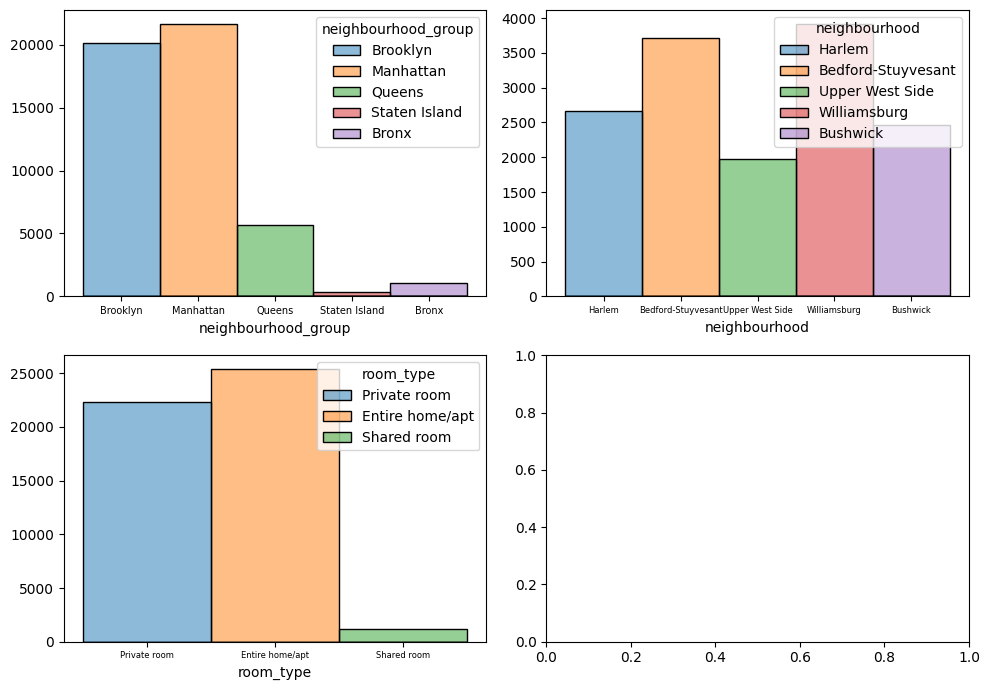

In [20]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data_ab, x = "neighbourhood_group", hue='neighbourhood_group').set(ylabel = None)
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), fontsize='7') 

sns.histplot(ax = axis[0, 1], data = data_ab_nb, x = "neighbourhood", hue='neighbourhood').set(ylabel = None)
axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), fontsize='6') 

sns.histplot(ax = axis[1, 0], data = data_ab, x = "room_type", hue='room_type').set(ylabel = None)
axis[1, 0].set_xticklabels(axis[1, 0].get_xticklabels(), fontsize='6') 

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Análisis sobre variables numéricas
Las variables numericas esta representadas por: host_id, price, latitude,longitude, minimum_nights, reviews_per_month, calculated_host_listings_count y availability_365. A continuacion se haran analisis graficos para cada una de las variables, con el objeto de inferir datos de relevancia. Los datos de latitude y longitude referidos a la ubicacion del inmueble se haran mas adelante.

- <span style="color: magenta;">price:</span> La variable precio tiene un sesgo positivo y valores atipicos que se deben revisar mas adelante, por ejemplo, se tiene un valor maximo de 10000. La media es 152.7 y con mediana de 106, evidenciandose un sesgo o asimetria positiva. Existen 11 registros con precio cero (0) que seran eliminados de la data, estos registros no afectan los valores de la media y mediana. El 83% de los datos se encuentran entre 10 y 200 dolares, 12% de los precios entre 200 y 350, finalmente, el 5% por encima de 350.

- <span style="color: magenta;">host_id:</span> Identificador unico asignado a cada anfitrion. En este momento no podemos concluir nada importante sobre esta variable, mas adelante veremos si existe alguna correlacion con la variable price. 

- <span style="color: magenta;">minimum_nights:</span> Al hacer el conteo por los valores que se repiten, predominan los valores de 1,2 y 3 habitaciones, los valores atipicos de 1250,1000, 999,500,480,400,370 y 366, se reemplazaron por el promedio de la columna, ya que distorsionaban la data y el analisis de esta variable. No es logico reservar por mas dias de lo que tiene un año, en total fueron 13 registros. El valor de la mediana es de 3 y la media es 6,8. Sesgo o asimetria positiva. Hacer estos cambios no afecta los valores de la media y mediana. El 86% de los datos se encuentran entre 1 y 10 dias, el 12% entre 10 y 30 dias, el 1,5% por encima de 30 dias.

- <span style="color: magenta;">reviews_per_month:</span> La variable reviews_per_month tiene un sesgo importante, existe un valor atipico de 58.50 reviews_per_month, modificar o eliminar este registro no afecta en nada la media y mediana de esta variable. Esta variable tiene mas de 10000 valores nulos, son bastante significativos, son cerca del 21% del total. Se realizo un estudio de la mejor curva de ajuste para esta columna usando la libreria fitter, encontrando que la mejor curva de ajuste es la lognormal (metodo suma errores minimos cuadrados), se procedio a estimar esta poblacion de valores nulos, para efectos practicos se quiere valorar la funcionalidad de esta libreria. Posterior a la estimacion de los valores nulos, la data muestra esta agrupacion: el 76% de los valores se encuentran entre 0.007 y 2, el 19.5% entre 2 y 5, el 4.4% entre 5 y 30, por ultimo, el 0.1% mayor a 30.    

- <span style="color: magenta;">calculated_host_listings_count:</span>El 66% de los valores son menores o iguales a 1, el 27,8% son valores mayores a 1 y menores o iguales a 10, el 4,5% estan ubicados sobre 10 y menores o iguales a 100, por encima de 100 se encuentra el 1,7%. Esta variable tiene un media de 7,14, una moda de  y un valor maximo de 327.  

- <span style="color: magenta;">availability_365:</span>:El percentil 50 esta dado por el valor de 45, esta variable tiene un media de 112.8, con un valor maximo de 365. A simple vista no se tienen valores atipicos. El 22,5% de los valores son mayores a 250 dias, 14.6% esta entre 50 y 150 dias, 11.9% esta entre 150 y 250 dias, 9.8% esta entre 10 y 50 dias, por ulimo, por debajo de 10 (inclusive) se encuentra el 5.3%.  

In [21]:
data_ab['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [22]:
data_ab['minimum_nights'].describe()

count    48884.000000
mean         6.840365
std         16.450721
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        365.000000
Name: minimum_nights, dtype: float64

#### Estimacion valores nulos variable reviews_per_month

In [23]:
reviews_sin_nulos=data_ab['reviews_per_month'].dropna()
idx_nulos=data_ab.index[data_ab['reviews_per_month'].isnull()]
idx_nulos

Index([    2,    19,    26,    36,    38,   193,   204,   260,   265,   267,
       ...
       48885, 48886, 48887, 48888, 48889, 48890, 48891, 48892, 48893, 48894],
      dtype='int64', length=10051)

2024-05-30 15:45:14.927 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.064914)
2024-05-30 15:45:14.935 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.734278)
2024-05-30 15:45:14.937 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.383793)
2024-05-30 15:45:14.979 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.326382)
2024-05-30 15:45:15.093 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.00639)
2024-05-30 15:45:15.127 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.104244)
2024-05-30 15:45:15.150 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.363997)
2024-05-30 15:45:15.663 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.006390,1484.536729,1510.237806,inf,0.074460,1.104472e-187
gamma,0.017499,4221.504233,4247.205310,inf,0.155883,0.000000e+00
chi2,0.042752,3147.453472,3173.154549,inf,0.044558,1.956474e-67
expon,0.064914,4356.823457,4373.957509,inf,0.143535,0.000000e+00
exponpow,0.091841,43676.003040,43701.704117,inf,0.109864,0.000000e+00


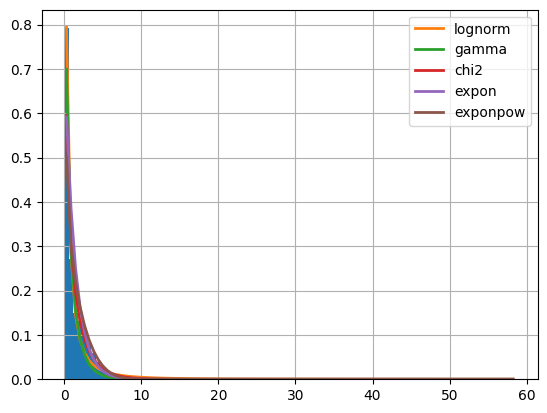

In [24]:
# Selecciona la columna que deseas analizar
height = reviews_sin_nulos
# Crea un objeto Fitter con la columna seleccionada
f = Fitter(height, distributions=get_common_distributions())
# Ajusta las distribuciones a los datos
f.fit()
# Muestra el resumen de las distribuciones ajustadas
f.summary()

In [25]:
np.random.seed(0)
shape, scale, loc = lognorm.fit(reviews_sin_nulos)
lognorm_valores = pd.Series(lognorm.rvs(shape, scale, loc, size=data_ab['reviews_per_month'].isnull().sum()),index=idx_nulos)  
#lognorm_valores
data_ab.loc[lognorm_valores.index,'reviews_per_month']=lognorm_valores.values

In [26]:
data_ab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  float64
 8   reviews_per_month               48884 non-null  float64
 9   calculated_host_listings_count  48884 non-null  int64  
 10  availability_365                48884 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 5.5+ MB


#### Valores nulos ajustados en variables numericas

In [27]:
mk=data_ab.isnull().sum()
print(mk)


host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


#### Graficos Variables Numericas

Dada la cantidad de datos del dataset, se va a proceder a generar columnas nuevas con rangos de valores para las variables, de esta forma podremos obtener conclusiones mas claras de la data.

In [28]:
data_ab['price_range'] = pd.cut(data_ab['price'],bins=[0,100,200,350, float('inf')],
                labels=['<=$100', '$100-$200', '$200-$350','>$350'])

In [29]:
data_ab['min_nights_range'] = pd.cut(data_ab['minimum_nights'],bins=[0,3,10,30, float('inf')],
                labels=['1d-3d','3d-10d','10d-30d','>30d'])

In [30]:
data_ab['rev_months_range'] = pd.cut(data_ab['reviews_per_month'],bins=[0,0.5,2,5,30, float('inf')],
                labels=['<=0.5','0.5-2','2-5','5-30','>30'])

In [31]:
data_ab['calculated_host_listings_count_range']=pd.cut(data_ab['calculated_host_listings_count'],bins=[0,1,10,100,float('inf')],
                labels=['<=1','1-10','10-100','>100'])

In [32]:
data_ab['av_365_range']=pd.cut(data_ab['availability_365'],bins=[0,10,50,150,250,float('inf')],
                labels=['<=10d','10d-50d','50d-150d','150d-250d','>250d'],include_lowest=True)

In [33]:
data_ab['av_365_range'].info()

<class 'pandas.core.series.Series'>
Index: 48884 entries, 0 to 48894
Series name: av_365_range
Non-Null Count  Dtype   
--------------  -----   
48884 non-null  category
dtypes: category(1)
memory usage: 1.4 MB


In [34]:
print(data_ab.shape)
a,b,c,d,e=data_ab['av_365_range'].value_counts()
print(a,b,c,d,e,((e)/48884))
data_ab['av_365_range'].value_counts()

(48884, 16)
20142 10987 7151 5822 4782 0.09782341870550691


av_365_range
<=10d        20142
>250d        10987
50d-150d      7151
150d-250d     5822
10d-50d       4782
Name: count, dtype: int64

In [35]:
data_ab['av_365_range'].describe()

count     48884
unique        5
top       <=10d
freq      20142
Name: av_365_range, dtype: object

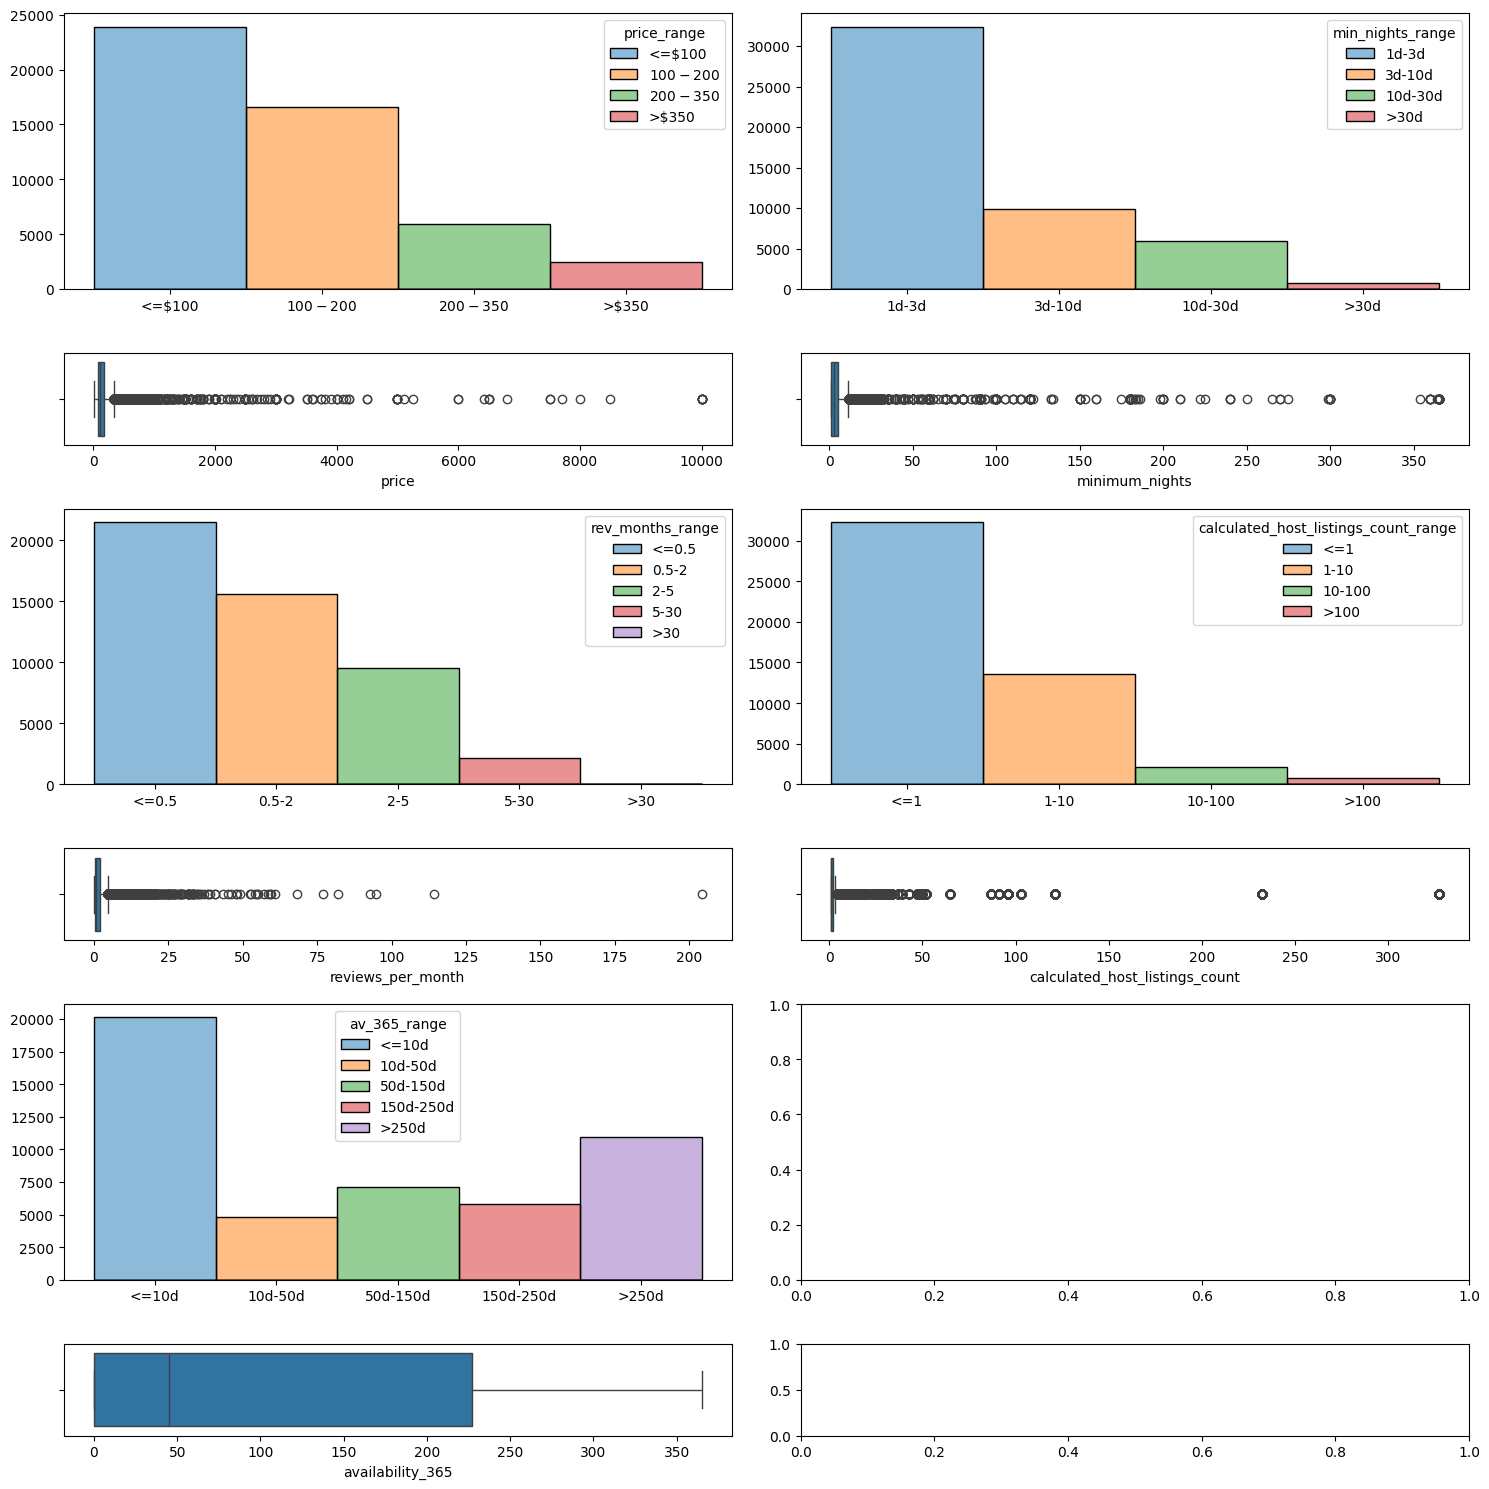

In [36]:
fig, axis = plt.subplots(6, 2, figsize = (15, 15), gridspec_kw={'height_ratios': [6,2,6,2,6,2]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_ab, x = "price_range", hue='price_range').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = data_ab, x = "price")
sns.histplot(ax = axis[0, 1], data = data_ab, x = "min_nights_range", hue='min_nights_range').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_ab, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = data_ab, x = "rev_months_range", hue='rev_months_range').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = data_ab, x = "reviews_per_month")
sns.histplot(ax = axis[2, 1], data = data_ab, x = "calculated_host_listings_count_range", hue='calculated_host_listings_count_range').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = data_ab, x = "calculated_host_listings_count")
sns.histplot(ax = axis[4, 0], data = data_ab, x = "av_365_range", hue='av_365_range').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 0], data = data_ab, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [37]:
data_ab.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_range', 'min_nights_range',
       'rev_months_range', 'calculated_host_listings_count_range',
       'av_365_range'],
      dtype='object')

## Paso 4. Análisis de variables multivariante
### Análisis numérico-numérico
Se va a comparar la variable objetivo price con las variables predictoras: host_id, minimum_nights, reviews_per_month, calculated_host_listings_count y availability_365.

- En terminos generales, el precio tiene una correlacion muy baja con estas variables numericas

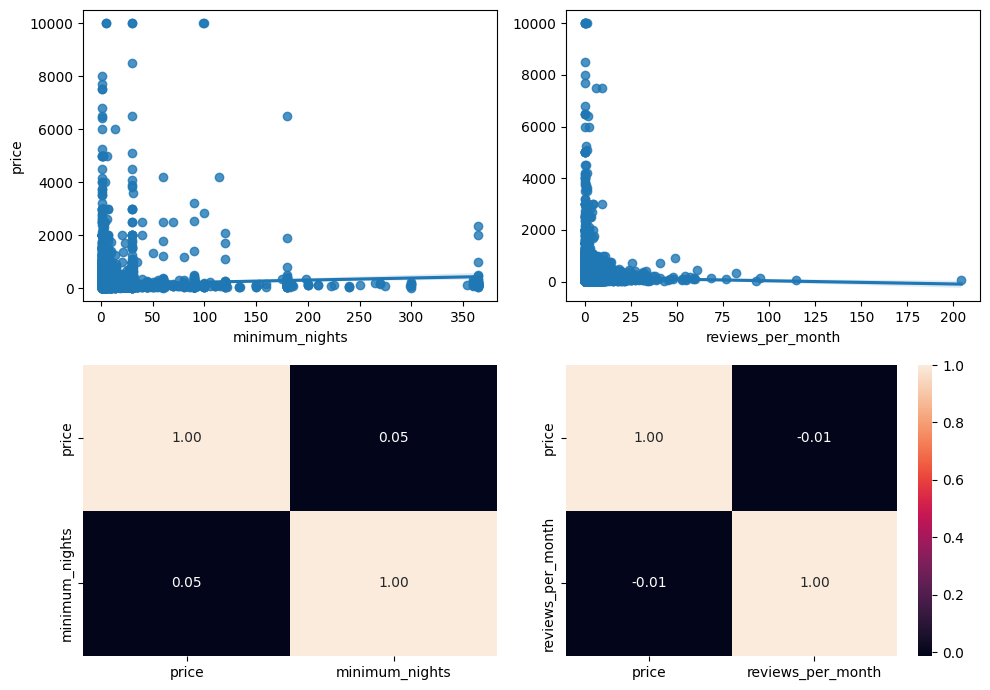

In [38]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_ab, x = "minimum_nights", y = "price")
sns.heatmap(data_ab[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_ab, x = "reviews_per_month", y = "price").set(ylabel=None)
sns.heatmap(data_ab[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

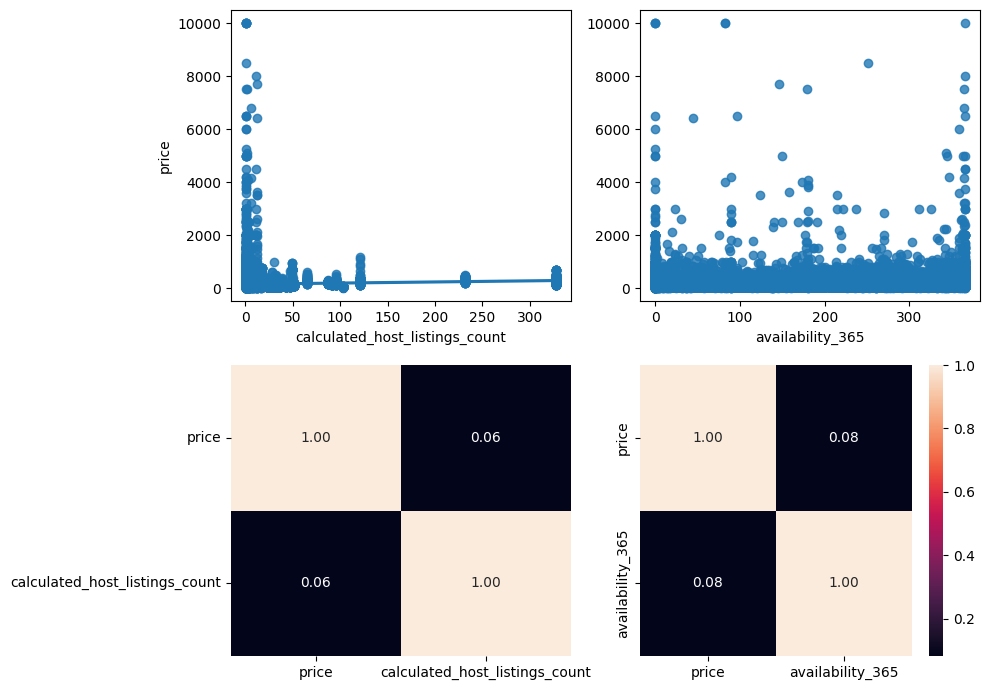

In [39]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_ab, x = "calculated_host_listings_count", y = "price")
sns.heatmap(data_ab[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_ab, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(data_ab[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

<Axes: >

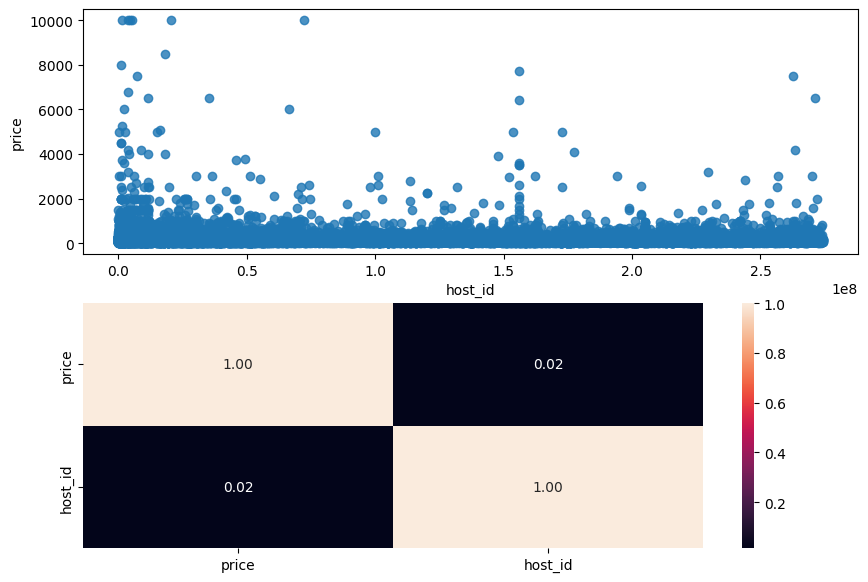

In [40]:
fig, axis = plt.subplots(2,1, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = data_ab, x = "host_id", y = "price")
sns.heatmap(data_ab[["price", "host_id"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = True)

### Análisis numerico (price) - categórico

In [41]:
data_ab.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_range', 'min_nights_range',
       'rev_months_range', 'calculated_host_listings_count_range',
       'av_365_range'],
      dtype='object')

#### Grafico de Ubicacion de los Vecindarios segun su latitud y longitud geografica

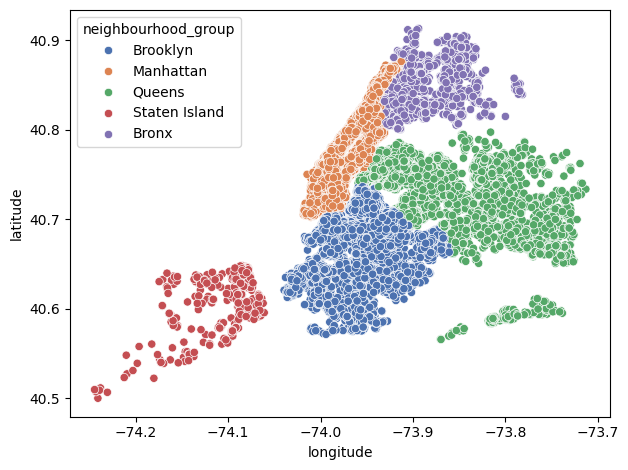

In [42]:
custom_palette = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=data_ab, palette=custom_palette)
plt.tight_layout()

In [43]:
data_manh=data_ab.loc[data_ab.neighbourhood_group=='Manhattan']
data_brook=data_ab.loc[data_ab.neighbourhood_group=='Brooklyn']
data_quee=data_ab.loc[data_ab.neighbourhood_group=='Queens']
data_stat=data_ab.loc[data_ab.neighbourhood_group=='Staten Island']
data_bronx=data_ab.loc[data_ab.neighbourhood_group=='Bronx']

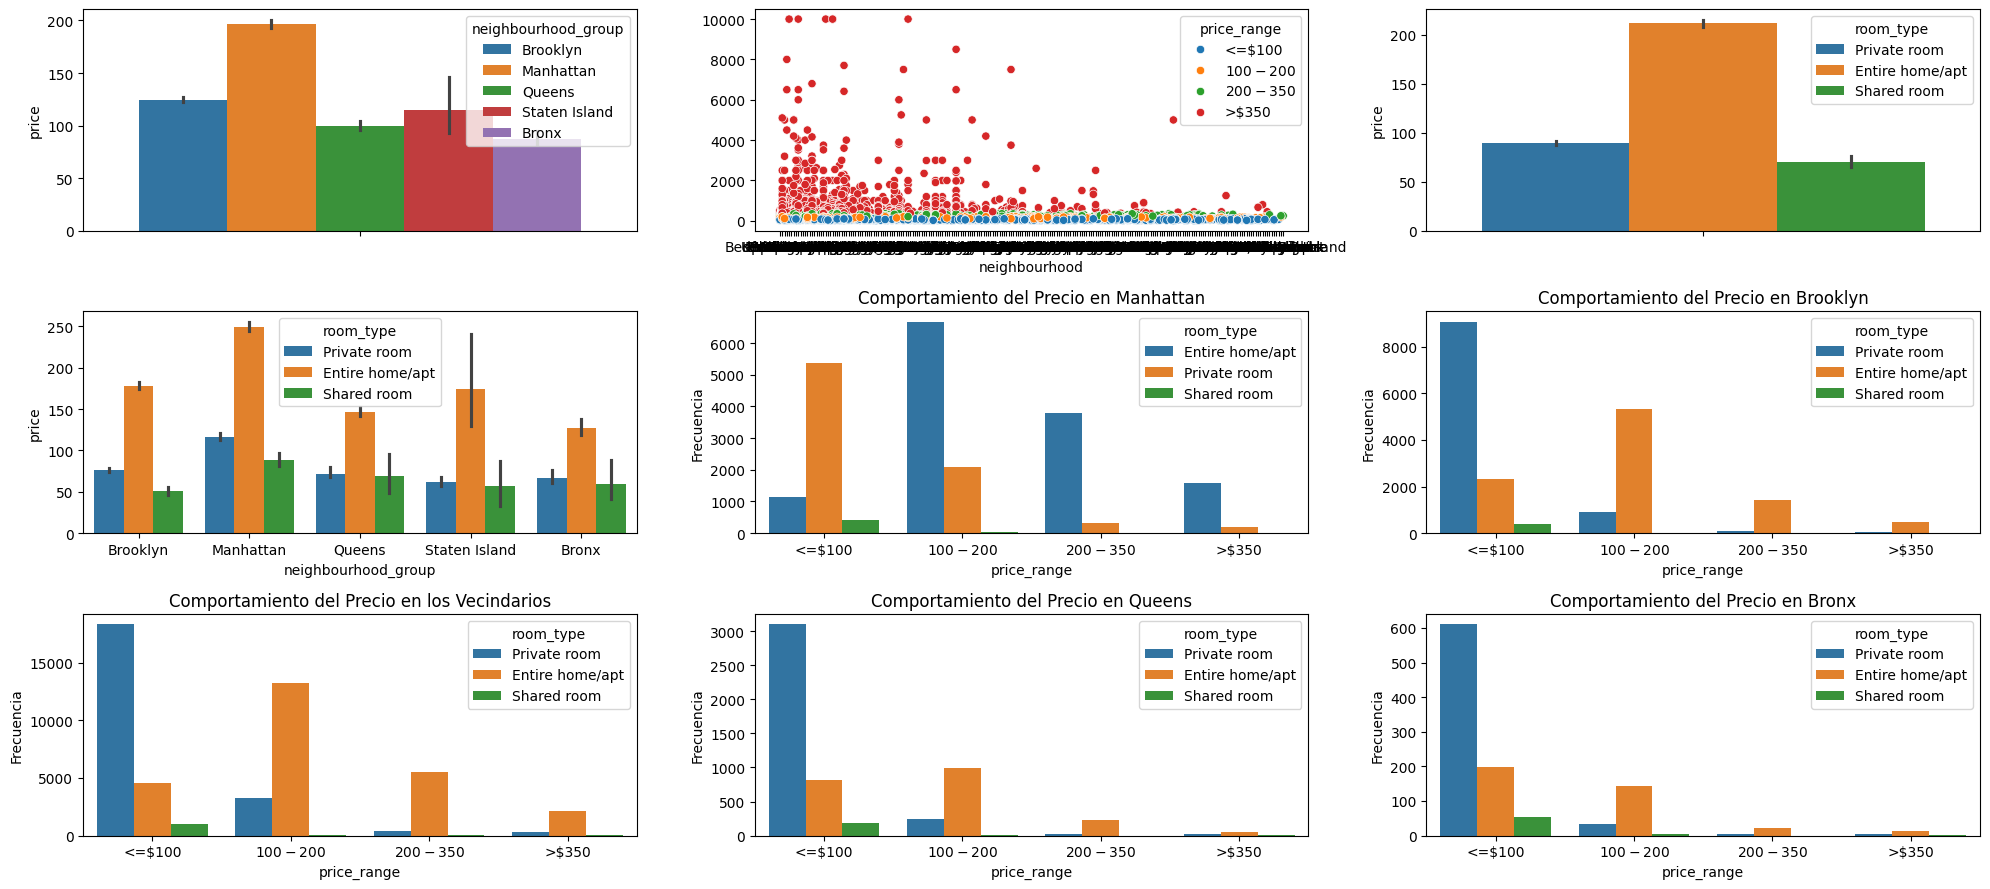

In [44]:
fig, axis = plt.subplots(3, 3, figsize = (20, 9))

sns.barplot(ax = axis[0, 0], data = data_ab, y = "price", hue = "neighbourhood_group")
sns.scatterplot(ax = axis[0, 1], data = data_ab, x = 'neighbourhood',y='price', hue = "price_range").set(ylabel = None)
sns.barplot(ax = axis[0, 2],data=data_ab,y='price', hue='room_type' )
sns.barplot(ax = axis[1,0],data=data_ab,x = 'neighbourhood_group',y='price', hue='room_type' )
sns.countplot(ax = axis[1,1], data = data_manh, x = 'price_range',hue = "room_type").set(ylabel = 'Frecuencia')
axis[1,1].set_title("Comportamiento del Precio en Manhattan")
sns.countplot(ax = axis[1,2], data = data_brook, x = 'price_range',hue='room_type').set(ylabel = 'Frecuencia')
axis[1,2].set_title("Comportamiento del Precio en Brooklyn")
sns.countplot(ax = axis[2,0], data = data_ab, x = 'price_range',hue='room_type').set(ylabel = 'Frecuencia')
axis[2,0].set_title("Comportamiento del Precio en los Vecindarios")
sns.countplot(ax = axis[2,1], data = data_quee, x = 'price_range',hue='room_type').set(ylabel = 'Frecuencia')
axis[2,1].set_title("Comportamiento del Precio en Queens")
sns.countplot(ax = axis[2,2], data = data_bronx, x = 'price_range',hue='room_type').set(ylabel = 'Frecuencia')
axis[2,2].set_title("Comportamiento del Precio en Bronx")

plt.tight_layout()
#fig.delaxes(axis[1, 2])

plt.show()

In [45]:
#data_ab.loc[data_ab.room_type=='Entire home/apt']['price'].value_counts()
d1=data_manh[data_manh.price>=350]
d1

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,price_range,min_nights_range,rev_months_range,calculated_host_listings_count_range,av_365_range
61,60278,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180.0,0.120000,1,180,>$350,>30d,<=0.5,<=1,150d-250d
103,93790,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4.0,0.550000,2,243,>$350,3d-10d,0.5-2,1-10,150d-250d
114,72062,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2.0,0.060000,4,298,$200-$350,1d-3d,<=0.5,1-10,>250d
233,289653,Manhattan,SoHo,40.72003,-74.00262,Entire home/apt,500,4.0,0.990000,1,329,>$350,3d-10d,0.5-2,<=1,>250d
242,291112,Manhattan,Chelsea,40.74358,-74.00027,Entire home/apt,500,2.0,0.340000,1,348,>$350,1d-3d,<=0.5,<=1,>250d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48748,133288905,Manhattan,Midtown,40.75174,-73.97343,Entire home/apt,369,4.0,0.414217,3,4,>$350,3d-10d,<=0.5,1-10,<=10d
48755,273812306,Manhattan,Midtown,40.75288,-73.97269,Private room,380,3.0,0.199494,1,3,>$350,1d-3d,<=0.5,<=1,<=10d
48757,11454384,Manhattan,Tribeca,40.71815,-74.01145,Entire home/apt,700,3.0,0.268557,1,37,>$350,1d-3d,<=0.5,<=1,10d-50d
48833,29741813,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2.0,0.389167,1,64,>$350,1d-3d,<=0.5,<=1,50d-150d


#### Principales conclusiones
Cualquier analisis posterior sobre el precio en relacion a otra variable, debe considerar una segmentacion por vecindario, dado que a lo largo de todo Nueva York, se puede encontrar propiedades en alquiler en todos los rangos de precios, esto se puede apreciar en los siguientes graficos de scatterplot, donde se cosidero la latitud y longitud, con la distribucion de rangos de precios. A continuacion algunas reflexiones. 

- Se observa que los precios en el vecindario (neighbourhood_group) de Manhattan presentan los mayores valores.
- Los precios estan relacionados con la variable room_type, los maximos se encuentran ubicados en la categoria Entire home/apt.
- Se mantiene la relacion aparente entre el precio y las variables neighbourhood_group y room_type, cuando las graficamos en un barplot, por ejemplo, mayores precios en manhattan en el room_type Entire home/apt.
- Cuando se hace un analisis de los rangos de precios por neighbourhood_group y room_type, se observa que la mayor oferta en alquileres es del tipo Private room, seguido de Entire home/apt. El comportamiento es el mismo en toda la variable neighbourhood_group. Observandose en Manhattan como lidera las ofertas con precios por encima de los 350$. 



In [46]:
data_ab['price_range'].value_counts()

price_range
<=$100       23917
$100-$200    16583
$200-$350     5928
>$350         2456
Name: count, dtype: int64

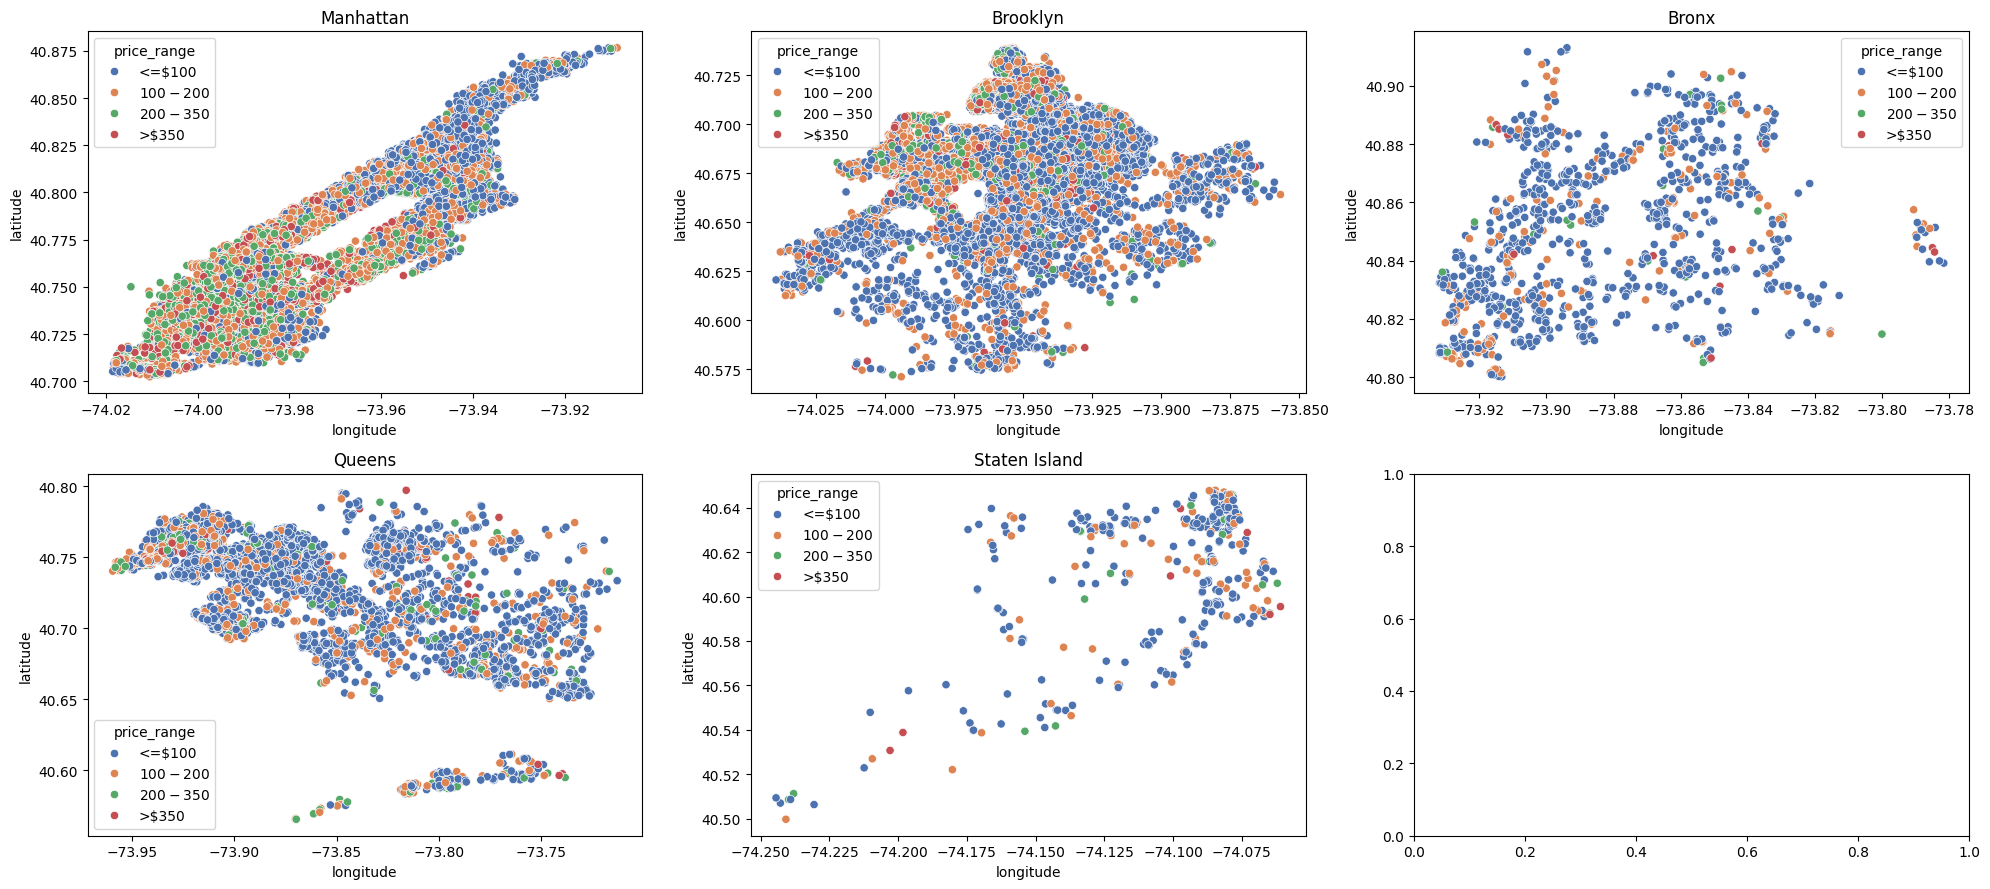

In [47]:
fig, axis = plt.subplots(2, 3, figsize = (20, 9))


custom_palette = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(ax=axis[0,0],x='longitude', y='latitude', hue='price_range', data=data_manh, palette=custom_palette)
axis[0,0].set_title('Manhattan')
sns.scatterplot(ax=axis[0,1],x='longitude', y='latitude', hue='price_range', data=data_brook, palette=custom_palette)
axis[0,1].set_title('Brooklyn')
sns.scatterplot(ax=axis[0,2],x='longitude', y='latitude', hue='price_range', data=data_bronx, palette=custom_palette)
axis[0,2].set_title('Bronx')
sns.scatterplot(ax=axis[1,0],x='longitude', y='latitude', hue='price_range', data=data_quee, palette=custom_palette)
axis[1,0].set_title('Queens')
sns.scatterplot(ax=axis[1,1],x='longitude', y='latitude', hue='price_range', data=data_stat, palette=custom_palette)
axis[1,1].set_title('Staten Island')
plt.tight_layout()

#### Factorizacion de variables categoricas

In [48]:
data_ab["neighbourhood_group_f"] = pd.factorize(data_ab["neighbourhood_group"])[0]
data_ab["neighbourhood_f"] = pd.factorize(data_ab["neighbourhood"])[0]
data_ab["room_type_f"] = pd.factorize(data_ab["room_type"])[0]
data_manh['neighbourhood_f']=pd.factorize(data_manh["neighbourhood"])[0]

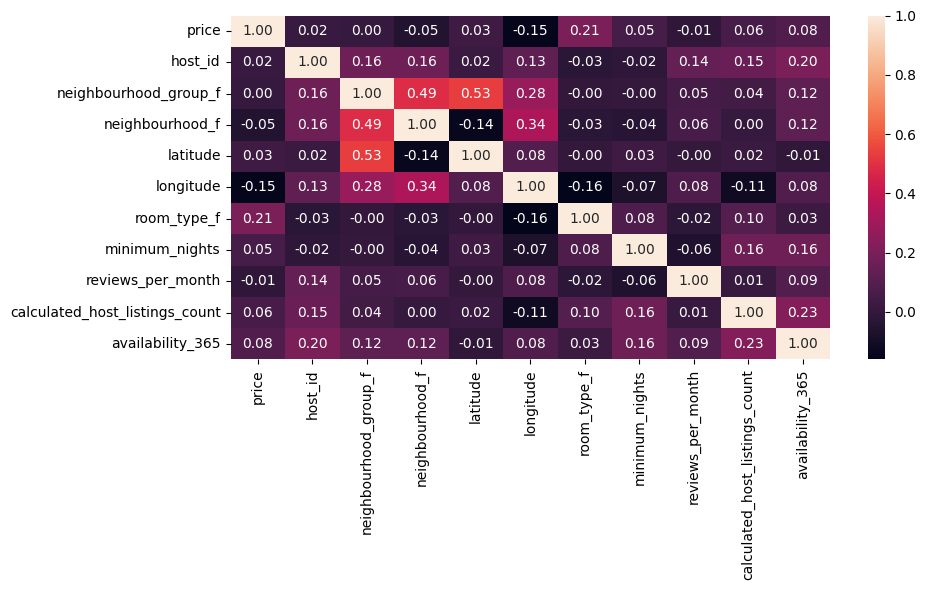

In [49]:
#data_ab["room_type"].value_counts()
fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=data_ab[['price','host_id', 'neighbourhood_group_f', 'neighbourhood_f', 'latitude',
       'longitude', 'room_type_f', 'minimum_nights',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

#### Conclusiones Matriz de Correlaciones

La principal conclusion en esta etapa del analisis es la poca correlacion que existe entre las variables. Si consideramos valores sobre 0,20. Solo tenemos dos observaciones que hacer:

- El precio aparentemente esta vinculado con la variable room_type, poseen una correlacion de 0.21, valor que mencionamos es bajo.
- Los propietarios (host_id) con mas anuncios (calculated_host_listings_count) tienen mayor disponibilidad en el año para alquilar. Correlación de 0.23.
- Obviamente esta clara la correlacion entre las variables: neighbourhood_group, neighbourhood, latitude y longitude, relacionadas con la ubicacion del inmueble.

In [50]:
data_ab.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_range', 'min_nights_range',
       'rev_months_range', 'calculated_host_listings_count_range',
       'av_365_range', 'neighbourhood_group_f', 'neighbourhood_f',
       'room_type_f'],
      dtype='object')

### Paso 5. Ingenieria de Características

Previamente he realizado parte de la ingeniería de funciones, principalmente con las variables: **price** (elimine los registros con precio iguales a cero), **minimum_nights** (los valores mayores a 365 se reemplazaron con los promedios de la variable) y **reviews_per_month**, sobre esta variable se hizo un analisis estadístico para encontrar la mejor curva de ajuste para los datos, con el objeto de estimar los valores nulos, la distribucion seleccionada fue la lognormal.

Como complemento vamos a determinar los rangos para seleccionar los valores atípicos y de esta forma, se da cierre a la Ingeniería de Caracteríticas.

In [51]:
d_price=data_ab['price'].describe()
price_iqr=d_price['75%']-d_price['25%']
p_lim_sup=d_price['75%']+1.5*price_iqr
p_lim_inf=d_price['25%']-1.5*price_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [52]:
data_ab.loc[data_ab.price==0]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,price_range,min_nights_range,rev_months_range,calculated_host_listings_count_range,av_365_range,neighbourhood_group_f,neighbourhood_f,room_type_f


In [53]:
d_mn=data_ab['minimum_nights'].describe()
mn_iqr=d_mn['75%']-d_mn['25%']
mn_lim_sup=d_mn['75%']+1.5*mn_iqr
mn_lim_inf=d_mn['25%']-1.5*mn_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(mn_lim_sup, 2)} y {round(mn_lim_inf, 2)}," 
      f"con un rango intercuartílico de {round(mn_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0,con un rango intercuartílico de 4.0


In [54]:
# Limpieza de Outliers, vamos a seleccionar como limite superior el valor de 15, con esto aun se garantiza sacar los extremos por encima de 30

data_ab = data_ab[data_ab["minimum_nights"] <= 15]

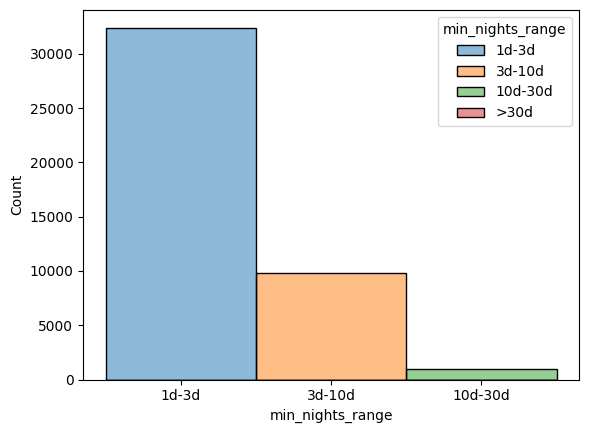

In [55]:
sns.histplot(data = data_ab, x = "min_nights_range", hue='min_nights_range')
plt.show()

<Axes: xlabel='minimum_nights'>

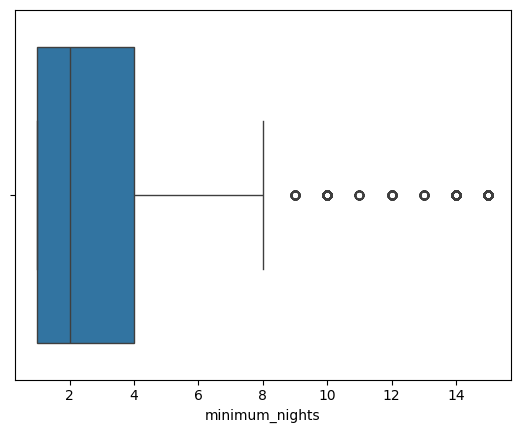

In [56]:
sns.boxplot(data = data_ab, x = "minimum_nights")

In [57]:
d_nrpm=data_ab['reviews_per_month'].describe()
nrpm_iqr=d_nrpm['75%']-d_nrpm['25%']
nrpm_lim_sup=d_nrpm['75%']+1.5*nrpm_iqr
nrpm_lim_inf=d_nrpm['25%']-1.5*nrpm_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(nrpm_lim_sup, 2)} y {round(nrpm_lim_inf, 2)}," 
      f"con un rango intercuartílico de {round(nrpm_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 4.88 y -2.59,con un rango intercuartílico de 1.87


In [58]:
# Elimino outliers, tomo como limite superior 6.75, me interesa sacar valores extremos por encima de 30

data_ab=data_ab[data_ab['reviews_per_month']<=6.75]

<Axes: xlabel='rev_months_range', ylabel='Count'>

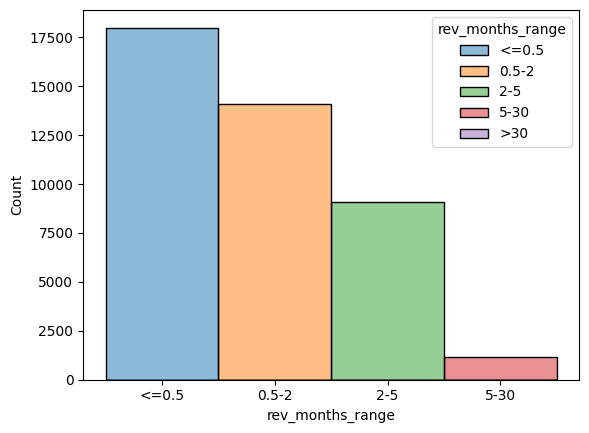

In [59]:
sns.histplot(data = data_ab, x = "rev_months_range", hue='rev_months_range')

In [60]:
d_chlc=data_ab['calculated_host_listings_count'].describe()
chlc_iqr=d_chlc['75%']-d_chlc['25%']
chlc_lim_sup=d_chlc['75%']+1.5*chlc_iqr
chlc_lim_inf=d_chlc['25%']-1.5*chlc_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(chlc_lim_sup, 2)} y {round(chlc_lim_inf, 2)}," 
      f"con un rango intercuartílico de {round(chlc_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5,con un rango intercuartílico de 1.0


In [61]:
# Elimino Outliers, en este caso tengo definido el limite superior en 3.5, sin embargo, dejaria muchos registros por fuera, 
# opte por seleccionar el valor de 15, con esto dejo los valores por encima de 100 por fuera y conservo data importante

data_ab=data_ab.loc[data_ab.calculated_host_listings_count<=15]

<Axes: xlabel='calculated_host_listings_count_range', ylabel='Count'>

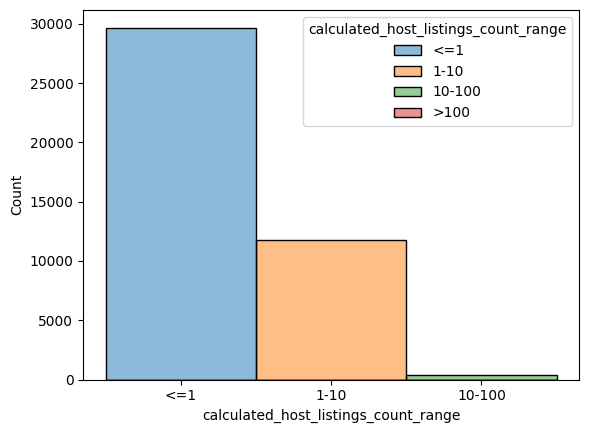

In [62]:
sns.histplot(data = data_ab, x = "calculated_host_listings_count_range", hue='calculated_host_listings_count_range')

<Axes: xlabel='calculated_host_listings_count'>

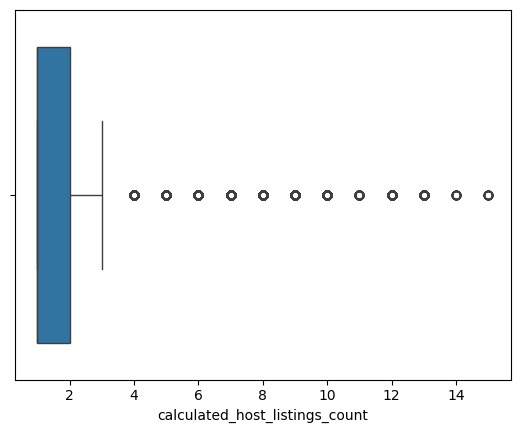

In [63]:
sns.boxplot(data = data_ab, x = "calculated_host_listings_count")

In [64]:
data_ab['calculated_host_listings_count'].describe()

count    41833.000000
mean         1.721990
std          1.712485
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: calculated_host_listings_count, dtype: float64

In [65]:
d_av=data_ab['availability_365'].describe()
av_iqr=d_av['75%']-d_av['25%']
av_lim_sup=d_av['75%']+1.5*av_iqr
av_lim_inf=d_av['25%']-1.5*av_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(av_lim_sup, 2)} y {round(av_lim_inf, 2)}," 
      f"con un rango intercuartílico de {round(av_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 447.5 y -268.5,con un rango intercuartílico de 179.0


In [66]:
# Esta variable no tiene Outliers

data_ab.loc[data_ab.availability_365>447.5]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,price_range,min_nights_range,rev_months_range,calculated_host_listings_count_range,av_365_range,neighbourhood_group_f,neighbourhood_f,room_type_f


#### Análisis de valores faltantes

In [67]:
data_ab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41833 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   host_id                               41833 non-null  int64   
 1   neighbourhood_group                   41833 non-null  object  
 2   neighbourhood                         41833 non-null  object  
 3   latitude                              41833 non-null  float64 
 4   longitude                             41833 non-null  float64 
 5   room_type                             41833 non-null  object  
 6   price                                 41833 non-null  int64   
 7   minimum_nights                        41833 non-null  float64 
 8   reviews_per_month                     41833 non-null  float64 
 9   calculated_host_listings_count        41833 non-null  int64   
 10  availability_365                      41833 non-null  int64   
 11  price_r

In [68]:
data_ab['room_type_f'].value_counts()

room_type_f
1    20941
0    19922
2      970
Name: count, dtype: int64

#### Escalado de Funciones

In [69]:
from sklearn.model_selection import train_test_split

num_variables = ['host_id','neighbourhood_group_f','neighbourhood_f','latitude','longitude','room_type_f','minimum_nights','reviews_per_month',
                 'calculated_host_listings_count','availability_365']

# Dividimos el conjunto de datos en muestras de train y test
X = data_ab.drop("price", axis = 1)[num_variables]
y = data_ab["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,host_id,neighbourhood_group_f,neighbourhood_f,latitude,longitude,room_type_f,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
23645,133426665,0,35,40.61462,-73.92108,0,1.0,2.68,1,333
10225,2682346,0,6,40.68910,-73.93926,1,2.0,0.08,1,0
18831,59839625,2,39,40.74211,-73.91646,1,2.0,1.42,1,13
35280,4290578,1,18,40.86524,-73.92195,0,1.0,1.37,1,0
32680,21216045,0,12,40.71233,-73.96208,1,4.0,0.95,1,60


##### Normalizacion.

A manera de practica vamos a emplear esta tecnica de escalado.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,host_id,neighbourhood_group_f,neighbourhood_f,latitude,longitude,room_type_f,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
23645,0.888201,-0.901731,0.132058,-2.037377,0.633837,-1.008191,-0.796980,0.964940,-0.420827,1.892096
10225,-0.808086,-0.901731,-0.688369,-0.701829,0.245112,0.834826,-0.395021,-0.846663,-0.420827,-0.783315
18831,-0.066523,1.406463,0.245220,0.248726,0.732622,0.834826,-0.395021,0.087009,-0.420827,-0.678870
35280,-0.787221,0.252366,-0.348882,2.456648,0.615235,-1.008191,-0.796980,0.052171,-0.420827,-0.783315
32680,-0.567629,-0.901731,-0.518626,-0.285278,-0.242826,0.834826,0.408898,-0.240473,-0.420827,-0.301259


##### Escalado Min - Max

A manera de practica vamos a emplear esta tecnica de escalado.

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,host_id,neighbourhood_group_f,neighbourhood_f,latitude,longitude,room_type_f,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
23645,0.486383,0.00,0.159091,0.277857,0.608434,0.0,0.000000,0.396330,0.0,0.912329
10225,0.009769,0.00,0.027273,0.458078,0.574224,0.5,0.071429,0.010694,0.0,0.000000
18831,0.218130,0.50,0.177273,0.586348,0.617127,0.5,0.071429,0.209445,0.0,0.035616
35280,0.015631,0.25,0.081818,0.884289,0.606797,0.0,0.000000,0.202029,0.0,0.000000
32680,0.077331,0.00,0.054545,0.514288,0.531284,0.5,0.214286,0.139734,0.0,0.164384


## Paso 6. Selección de Características

En este momento tenemos 10 variables predictoras en nuestro dataframe X, con el cual, se determinaron Xtrain y Xtest. Existen variables que presentan correlaciones moderadas entre ellas. Por ejemplo: neighbourhood_group_f, neighbourhood_f, latitude, longitude, incluso algunas vinculaciones con host_id, esta ultima tiene vinculaciones bajas con availability_365. Pienso que puedo descartar como 4 variables y quedarme a trabajar con 6.



In [72]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 6 decimos implícitamente que queremos eliminar 4 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,host_id,neighbourhood_f,longitude,room_type_f,calculated_host_listings_count,availability_365
0,133426665.0,35.0,-73.92108,0.0,1.0,333.0
1,2682346.0,6.0,-73.93926,1.0,1.0,0.0
2,59839625.0,39.0,-73.91646,1.0,1.0,13.0
3,4290578.0,18.0,-73.92195,0.0,1.0,0.0
4,21216045.0,12.0,-73.96208,1.0,1.0,60.0


In [73]:
X_test_sel.head()

,host_id,neighbourhood_f,longitude,room_type_f,calculated_host_listings_count,availability_365
0,4317067.0,21.0,-73.93102,0.0,1.0,60.0
1,10621862.0,14.0,-74.00656,1.0,1.0,4.0
2,28783846.0,23.0,-73.98924,1.0,1.0,0.0
3,39158104.0,100.0,-73.90961,0.0,1.0,162.0
4,24831061.0,1.0,-73.98191,1.0,8.0,0.0


In [74]:
# procedere a guardar los archivos Train's y Test's para futuros usos, es una data con procesamiento intermedio,
# porque faltaria ejecutar un posible escalamiento

X_train_sel.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/machine-learning-python-template/data/processed/X_train.csv')
X_test_sel.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/machine-learning-python-template/data/processed/X_test.csv')
y_train.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/machine-learning-python-template/data/processed/Y_train.csv')
y_test.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/machine-learning-python-template/data/processed/Y_test.csv')